# Classez des images à l'aide d'algorithmes de Deep Learning

## Le projet : 
Vous êtes bénévole pour l'association de protection des animaux de votre quartier. C'est d'ailleurs ainsi que vous avez trouvé votre compagnon idéal, Snooky. Vous vous demandez donc ce que vous pouvez faire en retour pour aider l'association.

Vous apprenez, en discutant avec un bénévole, que leur base de données de pensionnaires commence à s'agrandir et qu'ils n'ont pas toujours le temps de référencer les images des animaux qu'ils ont accumulées depuis plusieurs années. Ils aimeraient donc obtenir un algorithme capable de classer les images en fonction de la race du chien présent sur l'image.
Les données

Les bénévoles de l'association n'ont pas eu le temps de réunir les différentes images des pensionnaires dispersées sur leurs disques durs. Pas de problème, vous entraînerez votre algorithme en utilisant le Stanford Dogs Dataset.
Votre mission

L'association vous demande de réaliser un algorithme de détection de la race du chien sur une photo, afin d'accélérer leur travail d’indexation.

Vous avez peu d’expérience sur le sujet, vous décidez donc de contacter un ami expert en classification d’images.

Il vous conseille dans un premier temps de pré-processer des images avec des techniques spécifiques (e.g. whitening, equalization, éventuellement modification de la taille des images) et de réaliser de la data augmentation (mirroring, cropping...).

Ensuite, il vous incite à mettre en œuvre deux approches s’appuyant sur l’état de l’art et l’utilisation de CNN (réseaux de neurones convolutionnels), que vous comparerez en termes de temps de traitement et de résultat :

* Une première en réalisant votre propre réseau CNN, en vous inspirant de réseaux CNN existants. Prenez soin d'optimiser certains hyperparamètres (des layers du modèle, de la compilation du modèle et de l’exécution du modèle)
* Une deuxième en utilisant le transfer learning, c’est-à-dire en utilisant un réseau déjà entraîné, et en le modifiant pour répondre à votre problème.

Concernant le transfer learning, votre ami vous précise que :

* Une première chose obligatoire est de réentraîner les dernières couches pour prédire les classes qui vous intéressent seulement.
* Il est également possible d’adapter la structure (supprimer certaines couches, par exemple) ou de réentraîner le modèle avec un très faible learning rate pour ajuster les poids à votre problème (plus long) et optimiser les performances.

Ressources de calcul

Votre ami vous alerte sur le fait que l'entraînement (même partiel) d'un réseau de neurones convolutionnels est très gourmand en ressources. Si le processeur de l’ordinateur un peu ancien de l’association ne suffit pas, il vous propose plusieurs solutions :

* Limitez le jeu de données, en ne sélectionnant que quelques classes (races de chiens), ce qui permettra déjà de tester la démarche et la conception des modèles, avant une éventuelle généralisation.
* Utilisez la carte graphique de l’ordinateur en tant que GPU (l'installation est un peu fastidieuse, et l'ordinateur est inutilisable le temps du calcul).

C'est l'occasion de vous initier au cloud computing, qui permet d'avoir temporairement accès à des machines très puissantes, en étant facturé seulement durant le temps d'utilisation. Le plus connu est AWS, mais d'autres existent (Google, Microsoft...).

Vous pouvez tester également Google Colaboratory qui permet de mettre en œuvre gratuitement des réseaux CNN utilisant de la GPU.
Livrables attendus

* Un notebook Python (non cleané, pour comprendre votre démarche).
* Un programme Python qui prend une image (array) en entrée et retourne la race la plus probable du chien présent sur l'image.
* Votre support de présentation à destination du bénévole qui gère la base de données, qui devra déployer en production la solution que vous préconisez.

Pour faciliter votre passage au jury, déposez sur la plateforme, dans un dossier nommé “P6_nom_prenom”, tous les livrables du projet. Chaque livrable doit être nommé avec le numéro du projet et selon l'ordre dans lequel il apparaît, par exemple “P6_01_notebook”, “P6_02_programme”, et ainsi de suite.
Modalités de la soutenance 

Ce projet fera l'objet d'une soutenance filmée auprès d'un mentor validateur.

Votre soutenance durera 25 minutes, découpées ainsi (à titre indicatif) :

* 5 min - Présentation de la problématique, du cleaning effectué, du feature engineering et de l'exploration
* 10 min - Présentation des différentes pistes de modélisation effectuées
* 10 min - Présentation du modèle final sélectionné (pour chaque approche) ainsi que des performances et améliorations effectuées
* 5 à 10 minutes de questions-réponses

Ressources complémentaires
1) Prétraitement des images 

Présentation d’une technique de preprocessing : le whitening.
Ce tutoriel présente les concepts de data augmentation. À vous de voir si cela peut améliorer vos performances sur ce projet !
Présentation d’une autre technique de preprocessing : l’equalization.
Deux cours sur le pre-processing d’images : le premier est succinct et illustre les techniques, c’est une bonne première approche ; le second fournit beaucoup de détails qui permettent de mieux appréhender les cas d’utilisation des différents filtres, notamment.

2) CNN et transfer learning

Guide d’utilisation de Google Colaboratory avec GPU.
Une présentation du transfer learning, ses avantages, les cas d’application et un exemple de code en Keras. 

## Plan du notebook :


Pour faciliter la lecture, il est possible de revenir à ce sommaire, en cliquant sur [back to menu](#menu) chaque fois qu'il apparaît. A partir de ce menu, il est possible de naviguer entre les parties en cliquant sur leur titre.


<a id ="menu"></a>
0. [Importer les données](#section0)
1. [Pré-process des images](#section1)
    1. [whitening](#section1.1)
<!--           1. [Dilatation of EAST boxes](#section1.1.1)
          2. [Layout parser trained on PubLayNet dataset results](#section1.1.2)
          3. [Call transfert learning best models (score param already set)](#section1.1.2)           -->
    2. [equalization](#section1.2)
    3. [modification de la taille des images](#section1.3)
    4. [data augmentation (mirroring, cropping...)](#section1.4)

2. [Mon réseau CNN](#section2)
    1. [Choix du modèle de réseau CNN existants](#section2.1)
    2. [Optimisation des hyperparamètres (des layers du modèle, de la compilation du modèle et de l’exécution du modèle)](#section2.2)
    
3. [ Transfert learning](#section3)
    1. [Choix du modèle pré-entrainé](#section3.1)
    2. [Choix de la bibliothèque pour faire le transfert](#section3.2)
    3. [Remove time - consuming models](#section3.3)

    Adapter la structure (supprimer certaines couches),
    Réentraîner le modèle avec un très faible learning rate  

In [1]:
## common libraries :
import matplotlib.pyplot as plt # Matplotlib is a plotting library for the Python but it has also some IO functions
import numpy as np #numpy is the "standard" Python library used to manipulate array and provides mathematical function
import pandas as pd
import random

## image and plot
import cv2

## file gestion :
from pathlib import Path # lib to handle filesystem paths with semantics appropriate for different OS
import os
import json


## tensorflow and keras :
# ! pip install torch==1.10.0+cpu torchvision==0.11.1+cpu torchaudio==0.10.0+cpu -f https://download.pytorch.org/whl/cpu/torch_stable.html
import keras # Keras is our Deep Learning framework
# from dlutils import unpreprocess, plot_confusion_matrix, create_subdataset ## an error 

## set global variables :
DATA_PATH = "/home/clairegayral/Documents/openclassroom/data/P6/"
RES_PATH = "/home/clairegayral/Documents/openclassroom/res/P6/"

2021-11-24 14:55:08.050747: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/clairegayral/.env_python/openclassroom/lib/python3.9/site-packages/cv2/../../lib64:
2021-11-24 14:55:08.050773: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<a id ="section0"></a>
[back to menu](#menu)

# 0. Importer les données :

Let's download a sample of the data :

In [2]:
if not os.path.isdir(DATA_PATH+"Images/"):
    print("downloading Images")
    ! wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
    ! tar xf images.tar --directory "/home/clairegayral/Documents/openclassroom/data/P6/"

# if not os.path.isdir(DATA_PATH+"train"):
# test_index = open(DATA_PATH+"test_data.mat","rb").read()
# test_index[:1000]

Let's get the file directories :

In [3]:
d_type = 'train'

## if I want to use the 100 dog by class proposed by the author of dataset :
# if not os.path.isdir(DATA_PATH + d_type):
if not os.path.isfile(RES_PATH + "list_" + d_type + "_imgdir.txt"): 
    print("extract list of filename")
    ## extract train and test sample list from .mat :
    import scipy.io
    mat = np.array(scipy.io.loadmat(DATA_PATH + d_type + "_data.mat")[d_type + "_info"][0][0][0])
    list_filedir = []
    for tmp in mat :
        list_filedir.append(tmp[0][0])
    open(RES_PATH + "list_" + d_type + "_imgdir.txt", "w").write('\n'.join(list_filedir))

list_filedir = open(RES_PATH + "list_" + d_type + "_imgdir.txt", "r").read()
list_filedir = list_filedir.split("\n")

Je n'ai pas besoin de l'intégralité du jeu de donné, je sélectionne 4 races prises au hasard. Ensuite, je copie l'ensemble train et test dans des fichiers à part. J'ai commenté cette partie pour garder les mêmes images pour travailler. 

In [22]:
## but I think I'd better choose K=4 races randomly :
K=4
list_races = np.unique([filename.split("/")[0] for filename in list_filedir])
# list_races = 
random.shuffle(list_races)
# print(list_races[:K]) ## copy brut just after :
sample_races = ['n02110185-Siberian_husky', 'n02098105-soft-coated_wheaten_terrier',
                'n02113799-standard_poodle', 'n02097298-Scotch_terrier']
print(sample_races)

# test_size = 0.2 #20% test and 80% train 
# ## save the filenames and copy the images in resp. train/ and test/
# train_filenames = {}
# test_filenames = {}
# Path(DATA_PATH+"train/").mkdir(parents=True, exist_ok=True)
# Path(DATA_PATH+"test/").mkdir(parents=True, exist_ok=True)

# for race in sample_races:
#     ## get the list of images and random shuffle
#     race_filenames = os.listdir(DATA_PATH+"Images/"+race+"/")
#     random.shuffle(race_filenames)
#     ## split the list into train and test :
#     n_test = int(np.floor(len(race_filenames)*test_size))
#     race_test = race_filenames[:n_test]
#     race_train = race_filenames[n_test:]
#     ## save in dict :
#     train_filenames[race] = race_train
#     test_filenames[race] = race_test
#     ## copy in file : 
#     for filename in race_train :
#         ## copy image : 
#         f = open(DATA_PATH+"Images/"+race+"/" + filename , 'rb').read()
#         open(DATA_PATH+"train/"+filename, 'wb').write(f)
#         ## copy annotations :
#         ann_name = filename.split(".")[0]
#         f = open(DATA_PATH + "Annotation/" + race + "/" + ann_name , 'r').read()
#         open(DATA_PATH + "train/" + ann_name, 'w').write(f)

#     for filename in race_test :
#         # ## copy train : 
#         f = open(DATA_PATH+"Images/"+race+"/" + filename , 'rb').read()
#         open(DATA_PATH+"test/"+filename, 'wb').write(f)
#         ## copy annotations :
#         ann_name = filename.split(".")[0]
#         f = open(DATA_PATH + "Annotation/" + race + "/" + ann_name , 'r').read()
#         open(DATA_PATH + "test/" + ann_name, 'w').write(f)
# with open(DATA_PATH + "test_dict_filename.json", 'w') as fp:
#     json.dump(test_filenames, fp)
# with open(DATA_PATH + "train_dict_filename.json", 'w') as fp:
#     json.dump(train_filenames, fp)

with open(DATA_PATH + "train_dict_filename.json", 'r') as fp:
    train_filenames = json.load(fp)
with open(DATA_PATH + "test_dict_filename.json", 'r') as fp:
    test_filenames = json.load(fp)
                               
list_train_filename = [x for v in train_filenames.values() for x in v]

['n02110185-Siberian_husky', 'n02098105-soft-coated_wheaten_terrier', 'n02113799-standard_poodle', 'n02097298-Scotch_terrier']


<a id ="section1"></a>
<a id ="section1.1"></a>

[back to menu](#menu)

# 1. Pré-process des images

## 1.A. Whitening
En suivant le tutoriel donné dans les ressources (http://mccormickml.com/2014/07/24/intuition-behind-whitening-image-patches/), sur une de mes images d'entrainement 

In [58]:
list_train_filename[1:2]

['n02110185_14056.jpg']

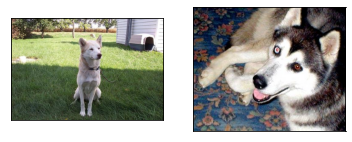

(333, 500, 3) (294, 360, 3)


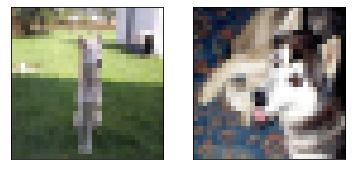

(32, 32, 3) (32, 32, 3)


In [82]:
## image 2 
plt.subplot(1,2,1)
filename1 = list_train_filename[1]
image1 = cv2.imread(DATA_PATH+"train/"+filename1)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(image1)
plt.xticks([]), plt.yticks([])

## image 2 
plt.subplot(1,2,2)
filename2 = list_train_filename[2]
image2 = cv2.imread(DATA_PATH+"train/"+filename2)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.imshow(image2)
plt.xticks([]), plt.yticks([]) 
plt.show()

## images must have same shape for this process ... I reshape :
print(image1.shape, image2.shape)
# width = min(image1.shape[0], image2.shape[0])
# height = min(image1.shape[1], image2.shape[1])
width = 32
height = 32


dim = (width, height)
# resize image
image1 = cv2.resize(image1, dim, interpolation = cv2.INTER_AREA)
image2 = cv2.resize(image2, dim, interpolation = cv2.INTER_AREA)

## check reshize deformation :
plt.subplot(1,2,1)
plt.imshow(image1)
plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(image2)
plt.xticks([]), plt.yticks([]) 
plt.show()
print(image1.shape, image2.shape)


In [107]:
X = np.array([image1,image2])

## flatten image :
print("Original image shape : ", X.shape)

X = X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3])
print("Flatten image shape : ", X.shape)
X.shape

Original image shape :  (2, 32, 32, 3)
Flatten image shape :  (2, 3072)


(2, 3072)

X.min() 0.0
X.max() 1.0
X means by pixel = [0.30196078 0.25686275 0.25098039 ... 0.10588235 0.13137255 0.11176471]
X means by pixel after centering = [ 0.00000000e+00  2.77555756e-17  1.38777878e-17 ... -6.93889390e-18
  0.00000000e+00  0.00000000e+00]


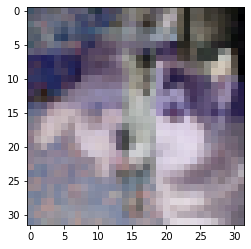

In [116]:
## 1. rescale the images
X_norm = X / 255.
print('X.min()', X_norm.min())
print('X.max()', X_norm.max())
## 2. Subtract the mean from all images
print("X means by pixel =",X_norm.mean(axis=0))
X_norm = X_norm - X_norm.mean(axis=0)
print("X means by pixel after centering =",X_norm.mean(axis=0))
cov = np.cov(X_norm, rowvar=False)

U,S,V = np.linalg.svd(cov)
epsilon = 0.1
X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(X_norm.T).T
X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())
plt.imshow(X_ZCA_rescaled[1,:].reshape(32,32,3))
plt.xticks([]), plt.yticks([]) 
plt.show()


Même pour deux images en 32x32 cette opération prend plusieurs secondes ... J'ai donc été voir s'il y avait des implémentations plus rapides. La suivante est faite image par image, et sans la flattenisation et centré-réduire. Elle a l'ai d'être faite en niveaux de gris.

La référence qui m'a éclairée : http://ufldl.stanford.edu/tutorial/unsupervised/PCAWhitening/

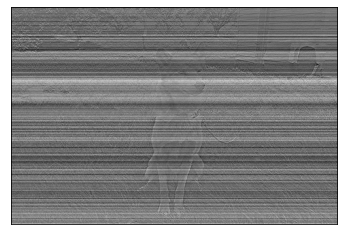

In [142]:
## compute ZCA transfo (including center reduce in fun) : 
def zca_whitening_matrix(image, epsilon=1e-5):
    '''
    Function to compute ZCA whitening matrix (aka Mahalanobis whitening).
    main ideas from https://stackoverflow.com/questions/31528800/how-to-implement-zca-whitening-python
    same function in : https://www.it-swarm-fr.com/fr/python/comment-mettre-en-oeuvre-le-blanchiment-zca-python/1054657420/
     
    Parameters:
    -----------------------------------------
    image: [M x N] matrix.
            Rows: Variables 
            Columns: Observations 
    epsilon = 1e-5 : Whitening constant, prevents division by zero
    
    Returns:
    -----------------------------------------
    Transition matrix ZCAMatrix: [M x M] matrix
    '''   
    # Covariance matrix [column-wise variables]: Sigma = (X-mu)' * (X-mu) / N
    sigma = np.cov(image, rowvar=True) # [M x M]
    # Singular Value Decomposition. X = U * np.diag(S) * V
    U,S,V = np.linalg.svd(sigma)
        # U: [M x M] eigenvectors of sigma.
        # S: [M x 1] eigenvalues of sigma.
        # V: [M x M] transpose of U
    # ZCA Whitening matrix: U * Lambda * U'
    ZCAMatrix = np.dot(U, np.dot(np.diag(1.0/np.sqrt(S + epsilon)), U.T)) # [M x M]
    return ZCAMatrix

gray1 = cv2.imread(DATA_PATH+"train/"+filename1,0)
ZCAMatrix = zca_whitening_matrix(gray1) # get X_ZCA
image_whitened = np.dot(ZCAMatrix, gray1)
plt.imshow(image_whitened,"gray")
plt.xticks([]), plt.yticks([]) 
plt.show()

In [107]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step
